In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import the data

In [14]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from utils.dataset import get_train_test_data

# get the train and test data in rgb format
(train_data, train_labels), (test_data, test_labels) = get_train_test_data(rgb=True, verbose=True)
# Turn the labels into one-bit-hot-encoding
train_labels_cat, test_labels_cat = to_categorical(train_labels), to_categorical(test_labels)
# convert the data to grayscale
train_data_gs, test_data_gs = (
    tf.image.rgb_to_grayscale(train_data).numpy(),
    tf.image.rgb_to_grayscale(test_data).numpy()
)

Train samples: 60000
Test samples: 10000
Data shape: (28, 28, 3)


# Visualize the overall distribution of the data in the latent space

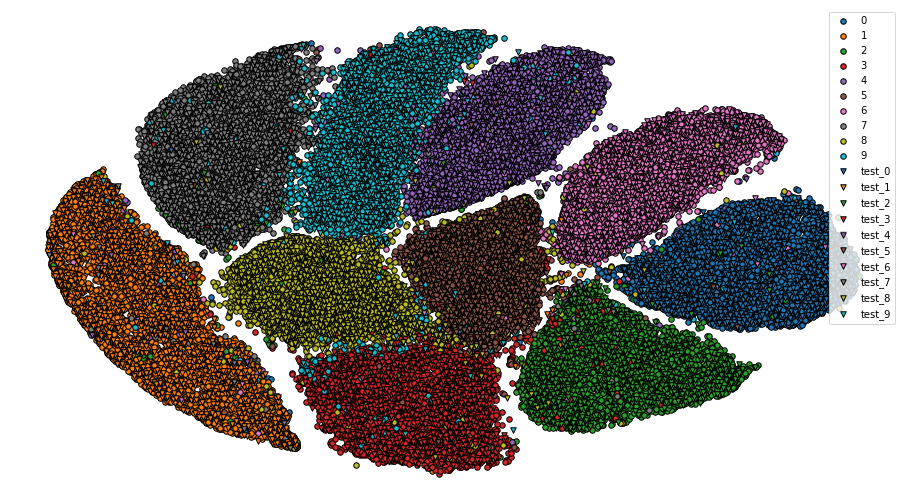

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
from utils.cluster.visualize import visualize_clusters
from utils.general import beep, save_figure

# concatenate the train and test data together to transform it in the same space
all_data_gs = np.concatenate((train_data_gs, test_data_gs))
all_data_gs = all_data_gs.reshape(all_data_gs.shape[0], -1)
# initial dimensionality reduction using PCA to reduce the time
pca_int = PCA(n_components=50).fit_transform(all_data_gs)
# reduce to 2d using t-SNE
all_data_ld = TSNE(init='pca', learning_rate='auto', perplexity=30, n_iter=300).fit_transform(
    pca_int
)
# split the data back into train and test
train_data_ls = all_data_ld[:train_data_gs.shape[0]]
test_data_ls = all_data_ld[train_data_gs.shape[0]:]

# show the train data
fig, ax = visualize_clusters(heatmaps=train_data_ls, clusters=train_labels)
visualize_clusters(heatmaps=test_data_ls, clusters=test_labels, fig=fig, ax=ax, marker='v', label_prefix='test')
save_figure(fig, '../out/mnist/explore/train_test_latent_space')

beep()

# Train the digit classifier
Train the digit classifier and save it to use the same model over time.

In [8]:
train_data.shape

TensorShape([60000, 28, 28, 3])

# Compute the predictions
Compute the predictions and export them to a file to use the same over time.

In [19]:
import numpy as np
from config import CLASSIFIER_PATH

# load the model
classifier = tf.keras.models.load_model(f'../{CLASSIFIER_PATH}')

# compute the predictions
predictions = classifier.predict(test_data).argmax(axis=-1)

np.savetxt('../in/predictions.csv', predictions, delimiter=',')